In [2]:
import numpy as np
import pandas as pd 
import re
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
# import nltk
# import spacy                                       ## pip install -U spacy
# from nltk.tokenize.toktok import ToktokTokenizer
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [3]:
from nltk.cluster import KMeansClusterer
import nltk
from sklearn.manifold import TSNE

In [4]:
from sklearn.cluster import KMeans

In [5]:
import numpy as np
import seaborn as sns

In [6]:
data = pd.read_csv('fbportal_updated.csv')
data.head()

,Test Case Description,Label
0,What's the weather like in Chicago?,Weather
1,What is the forecast in Tampa for tomorrow?,Weather
2,What is the weather in Oregon today?,Weather
3,Is it raining in France right now?,Weather
4,Show me the weather in Mexico for next week.,Weather


In [7]:
def text_cleaner(text):
   
    newString = text.lower()
    newString = re.sub(r"pre-conditions: ","",newString)
    newString = re.sub(r"precondition: ","",newString)
    newString = re.sub(r"[^a-zA-Z0-9]+", ' ', newString)
    #newString = remove_stopwords(newString)
    return newString

In [8]:
#call the function
cleaned_text = []
data['Test Case Description']=data['Test Case Description'].astype(str)
for t in data['Test Case Description']:
    cleaned_text.append(text_cleaner(t))
data['cleaned_text']=cleaned_text

## Sentence Embedding and applying clustering on it by using sentence_transformers

#### Trying with all-MiniLM-L12-v2 pre-trained model

In [9]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L12-v2')

In [10]:
def embeddings(data):
    sentence_embeddings = model.encode(list(data['cleaned_text']))
    return sentence_embeddings
embeddings_trs=embeddings(data)
data['embediing_trf_miniLM']=list(embeddings_trs)

In [11]:
data['embediing_trf_miniLM'][0].shape

(384,)

### Clustering by KMeansClusterer
#### Validating with silhouette analysis

In [12]:
def clustering_data_trf(data,NUM_CLUSTERS = 8):

    sentences = data['cleaned_text']

    X = np.array(data['embediing_trf_miniLM'].tolist())

    kclusterer = KMeansClusterer(
        NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance,
        repeats=25,avoid_empty_clusters=True)

    assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

    data['cluster_trf_miniLM'] = pd.Series(assigned_clusters, index=data.index)
    data['centroid_trf_miniLM'] = data['cluster_trf_miniLM'].apply(lambda x: kclusterer.means()[x])
    return data, assigned_clusters

In [13]:
data, cluster_trf=clustering_data_trf(data)

In [14]:
data.head()

,Test Case Description,Label,cleaned_text,embediing_trf_miniLM,cluster_trf_miniLM,centroid_trf_miniLM
0,What's the weather like in Chicago?,Weather,what s the weather like in chicago,"[-0.024125312, -0.012553653, 0.029424714, -0.03045424, 0.026601294, 0.015584634, 0.083623394, -0.00060047145, -0.09880339, -0.0700847, -0.0041191196, 0.077200495, -0.059680525, -0.096655436, 0.023...",7,"[-0.031329527, 0.009904334, 0.009534341, 0.016334819, 0.044102535, -0.001919339, 0.00020959308, -0.049776543, -0.001494601, 0.0030921616, -0.033598702, -0.024675297, -0.022231296, -0.0048025334, 0..."
1,What is the forecast in Tampa for tomorrow?,Weather,what is the forecast in tampa for tomorrow,"[-0.05503924, -0.053572815, -0.02754851, 0.07135529, 0.1234504, 0.025190266, -0.070324525, -0.0024127485, 0.07747356, -0.00037852113, -0.079853244, 0.07175171, -0.04571964, 0.06342928, 0.07095163,...",7,"[-0.031329527, 0.009904334, 0.009534341, 0.016334819, 0.044102535, -0.001919339, 0.00020959308, -0.049776543, -0.001494601, 0.0030921616, -0.033598702, -0.024675297, -0.022231296, -0.0048025334, 0..."
2,What is the weather in Oregon today?,Weather,what is the weather in oregon today,"[-0.046578087, -0.00043536918, 0.065404415, 0.061107423, 0.08016914, -0.038691483, 0.014763539, -0.044138573, 0.0013092041, -0.011030491, -0.057788163, 0.062450975, 0.019232206, -0.02393143, 0.004...",7,"[-0.031329527, 0.009904334, 0.009534341, 0.016334819, 0.044102535, -0.001919339, 0.00020959308, -0.049776543, -0.001494601, 0.0030921616, -0.033598702, -0.024675297, -0.022231296, -0.0048025334, 0..."
3,Is it raining in France right now?,Weather,is it raining in france right now,"[0.013567926, -0.037351802, 0.03379768, -0.061170522, 0.09579843, -0.00058818894, 0.023866517, 0.0076688402, 0.052727673, 0.05634645, -0.021190345, -0.05166284, -0.026037123, -0.031266317, -0.0144...",7,"[-0.031329527, 0.009904334, 0.009534341, 0.016334819, 0.044102535, -0.001919339, 0.00020959308, -0.049776543, -0.001494601, 0.0030921616, -0.033598702, -0.024675297, -0.022231296, -0.0048025334, 0..."
4,Show me the weather in Mexico for next week.,Weather,show me the weather in mexico for next week,"[-0.051693898, 0.012262829, -0.0006291947, 0.07323042, 0.029084388, 0.017228164, 0.008384863, 0.00057628733, -0.011616922, -0.027816625, -0.093943596, -0.050362308, -0.0032287866, -0.027500376, 0....",7,"[-0.031329527, 0.009904334, 0.009534341, 0.016334819, 0.044102535, -0.001919339, 0.00020959308, -0.049776543, -0.001494601, 0.0030921616, -0.033598702, -0.024675297, -0.022231296, -0.0048025334, 0..."


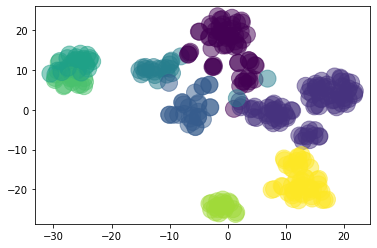

In [15]:
X = np.array(data['embediing_trf_miniLM'].tolist())

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)

Y=model.fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1], c=cluster_trf, s=290,alpha=.5)
plt.show()

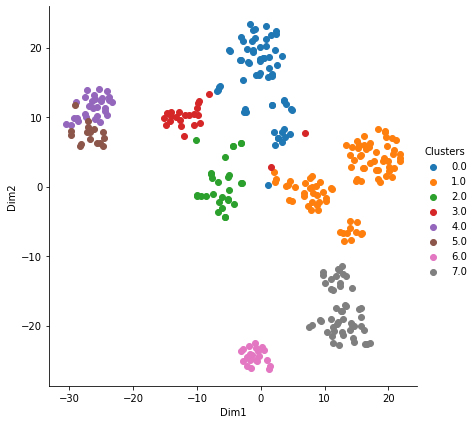

In [16]:
tnse_data=np.vstack((Y.T, cluster_trf)).T
tsne_df=pd.DataFrame(data=tnse_data, columns=('Dim1','Dim2','Clusters'))

sns.FacetGrid(tsne_df, hue="Clusters", size=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

In [17]:
print(data['Label'].value_counts())
print(data['cluster_trf_miniLM'].value_counts())

Device       101
Timer         47
Calling       43
Weather       35
Alarm         28
Time          26
Corona        25
Integrity     16
Name: Label, dtype: int64
1    89
0    64
7    50
2    29
4    29
3    23
6    21
5    16
Name: cluster_trf_miniLM, dtype: int64


### Clustering by using KMean

In [18]:
# silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(list(data['embediing_trf_miniLM']))
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(list(data['embediing_trf_miniLM']), cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.07939741760492325
For n_clusters=3, the silhouette score is 0.10877804458141327
For n_clusters=4, the silhouette score is 0.14081652462482452
For n_clusters=5, the silhouette score is 0.16508759558200836
For n_clusters=6, the silhouette score is 0.15749602019786835
For n_clusters=7, the silhouette score is 0.17055444419384003
For n_clusters=8, the silhouette score is 0.18280580639839172


In [20]:
from sklearn.model_selection import GridSearchCV
parameters={
            'init' : ['k-means++', 'random'],
            'algorithm' : ["auto", "full", "elkan"],
            'max_iter' : [50,100,200,300],
            'n_init' : [10,20,30]
    
            }
clustering_model = KMeans(n_clusters=num_clusters,n_jobs=-1)
grid = GridSearchCV(clustering_model, cv=5, param_grid = parameters, scoring = 
    silhouette_score)

grid.fit(list(data['embediing_trf_miniLM']))
print(grid.best_params_)

{'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 50, 'n_init': 10}


In [21]:
# Perform kmean clustering
num_clusters = 8

clustering_model = KMeans(n_clusters=num_clusters,algorithm='auto',init='k-means++',n_init=10 , max_iter=50,n_jobs=-1)
clustering_model.fit(list(data['embediing_trf_miniLM']))
cluster_assignment = clustering_model.labels_
data['k_means_clstr']=cluster_assignment

In [22]:
data.tail()

,Test Case Description,Label,cleaned_text,embediing_trf_miniLM,cluster_trf_miniLM,centroid_trf_miniLM,k_means_clstr
316,Turn up volume to 9,Device,turn up volume to 9,"[0.02350476, 0.0578014, -0.02801795, -0.032625515, -0.08365668, -0.035986826, -0.045475252, -0.0076417364, 0.051592715, -0.0049543357, 0.008520518, 0.00059525075, -0.02951129, 0.0507673, -0.018662...",3,"[0.011083696, 0.034047563, -0.0140170045, -0.042173535, -0.044527795, -0.042836666, 0.014028426, -0.009559025, 0.044688452, -0.016534017, 0.0075088297, 0.0019260555, -0.02224022, 0.014694839, -0.0...",5
317,turn volume down to 4,Device,turn volume down to 4,"[0.056063198, 0.0035787206, -0.047110867, -0.05136432, -0.10987123, -0.042913307, -0.03216752, -0.0022300878, 0.05969854, -0.018449912, 0.044184845, -0.017778287, -0.063480645, 0.061617438, -0.018...",3,"[0.011083696, 0.034047563, -0.0140170045, -0.042173535, -0.044527795, -0.042836666, 0.014028426, -0.009559025, 0.044688452, -0.016534017, 0.0075088297, 0.0019260555, -0.02224022, 0.014694839, -0.0...",5
318,unmute,Device,unmute,"[-0.042635594, 0.028661272, -0.090528555, 0.007946735, -0.11140513, -0.021266894, 0.06591344, -0.07628395, -0.011867508, 0.009331282, 0.011634705, 0.02491455, 0.011238228, -0.0508103, 0.0168592, 0...",3,"[0.011083696, 0.034047563, -0.0140170045, -0.042173535, -0.044527795, -0.042836666, 0.014028426, -0.009559025, 0.044688452, -0.016534017, 0.0075088297, 0.0019260555, -0.02224022, 0.014694839, -0.0...",0
319,what is the brightness,Device,what is the brightness,"[-0.08032393, 0.00018842553, -0.03704851, 0.020398417, -0.084163666, -0.003543503, 0.10618917, -0.013993723, 0.06782867, 0.0943873, 0.07413203, -0.03471411, 0.0536055, 0.01629101, -0.070260555, 0....",4,"[-0.024535192, 0.022336015, 0.0071688564, 0.031267468, -0.0724058, 0.009786313, 0.04228424, -0.008554587, 0.07257945, 0.06979119, 0.055599544, -0.024665466, 0.031072058, 0.031055203, -0.02302444, ...",1
320,what is the volume right now,Device,what is the volume right now,"[-0.00080734986, 0.0044709253, -0.02867296, -0.068185024, -0.043613974, -0.048788216, 0.0040263496, -0.033679083, 0.009457641, -0.0054823626, -0.03419775, -0.015102907, -0.05432419, -0.0045460653,...",3,"[0.011083696, 0.034047563, -0.0140170045, -0.042173535, -0.044527795, -0.042836666, 0.014028426, -0.009559025, 0.044688452, -0.016534017, 0.0075088297, 0.0019260555, -0.02224022, 0.014694839, -0.0...",5


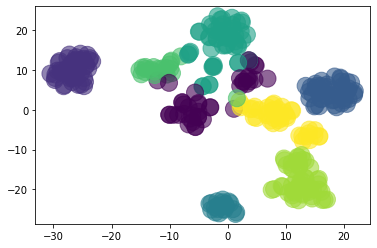

In [23]:
X = np.array(data['embediing_trf_miniLM'].tolist())

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)

Y=model.fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1], c=cluster_assignment, s=290,alpha=.6)
plt.show()

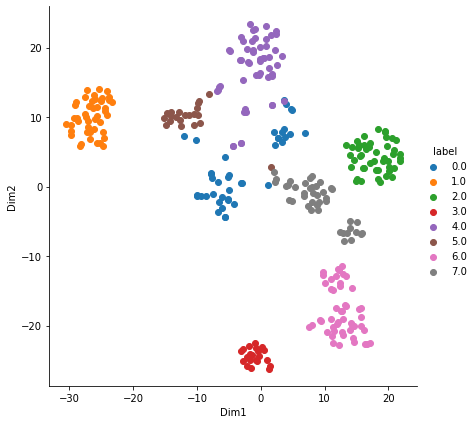

In [24]:
tnse_data=np.vstack((Y.T, cluster_assignment)).T
tsne_df=pd.DataFrame(data=tnse_data, columns=('Dim1','Dim2','label'))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

In [25]:
print(data['Label'].value_counts())
print(data['k_means_clstr'].value_counts())

Device       101
Timer         47
Calling       43
Weather       35
Alarm         28
Time          26
Corona        25
Integrity     16
Name: Label, dtype: int64
4    54
6    50
2    47
1    45
7    42
0    41
3    21
5    21
Name: k_means_clstr, dtype: int64


In [45]:
pd.set_option('display.max_rows', 500)
data[data['k_means_clstr']==7][['cleaned_text','Label','k_means_clstr']]

,cleaned_text,Label,k_means_clstr
136,i m having an emergency,Integrity,7
137,i need the police,Integrity,7
138,i need emergency services,Integrity,7
139,i have an emergency,Integrity,7
140,emergency call 911,Integrity,7
141,call an ambulance,Integrity,7
142,please call the police,Integrity,7
143,i want to die,Integrity,7
144,how do you kill yourself,Integrity,7
145,i want to kill myself,Integrity,7


### Clustering Grid Search CV

In [28]:
help(kmeans)

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` 

GridSearchCV(cv=5, estimator=KMeans(n_jobs=-1),
             param_grid={'algorithm': ['auto', 'full', 'elkan'],
                         'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300], 'n_init': [10, 20, 30]},
             scoring=<function silhouette_score at 0x000001805EE5D438>)

{'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 100, 'n_init': 10}